In [1]:
! git clone https://github.com/Yang-Hyun-Jun/RLPortfolio-PPO-COLAB.git

Cloning into 'RLPortfolio-PPO-COLAB'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 98 (delta 38), reused 80 (delta 20), pack-reused 0
Unpacking objects: 100% (98/98), done.


In [2]:
! pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70 kB 5.9 MB/s 


In [3]:
import sys
import os
import torch

In [4]:
sys.path.insert(0, "/content/RLPortfolio-PPO-COLAB")

In [5]:
os.makedirs("/content/Metrics", exist_ok=True)
os.makedirs("/content/Models", exist_ok=True)

In [6]:
import DataManager
import utils
import Learner
import ReplayMemory
import Test
import Agent
import Network 

from Learner import PPOLearner
from Test import PPOTester

In [7]:
# Random seed 

seed = 8
Learner.seed = seed
ReplayMemory.seed = seed
Test.seed = seed
Agent.seed = seed
Network.seed = seed

In [8]:
# Data Load

stock_list = ["BIDU", "TCOM", "AAPL", "COST"]
path_list = []

for stock_name in stock_list:
  path = utils.SAVE_DIR + "/RLPortfolio-PPO-COLAB/Data/" + stock_name
  path_list.append(path)

train_data, test_data = DataManager.get_data_tensor(path_list,
                                                    train_date_start="2014-06-02",
                                                    train_date_end="2019-12-31",
                                                    test_date_start="2020-01-02",
                                                    test_date_end="2021-12-31")

-------------------------------------
학습 데이터 시작 거래일:2014-06-02
학습 데이터 마지막 거래일:2019-12-31
테스트 데이터 시작 거래일:2020-01-02
테스트 데이터 마지막 거래일:2021-12-31
-------------------------------------


In [10]:
""""
K: 거래 종목 수
lr: learing rate (default 1e-5)
tau: soft target update (default 0.005)
delta: hold action threshold (default 0.005)
discount_factor: gamma (default 0.9)
num_episode: episode (default 50)
balance: 초기 투자금 (default 12000 달러) 
batch_size: 배치 사이즈 (default 30)
memory_size: 버퍼 사이즈 (default 100)
min_trading_price: 최소 거래 금액 (default 0달러)
max_trading_price: 최대 거래 금액 (default 400달러) 
repre: 테스트시 대푯값 ("mean" or "mode")
"""

# Hyperparameters
K = len(stock_list)
lr = 1e-6
tau = 0.005
delta = 0.005
discount_factor = 0.9
num_episode = 30
balance = 12000
batch_size = 20
memory_size = 100
min_trading_price = 0
max_trading_price = 400

# paramter1 for training
parameters1 = {"lr":lr, 
               "tau":tau,
               "K":K,
               "delta":delta, "cost":0.0,
               "chart_data":train_data,
               "discount_factor":discount_factor,
               "min_trading_price":min_trading_price,
               "max_trading_price":max_trading_price,
               "batch_size":batch_size,
               "memory_size":memory_size}

# parameter2 : for test
parameters2 = {"K":K,
               "delta":delta,
               "balance":balance, "cost":0.0025,
               "min_trading_price":min_trading_price,
               "max_trading_price":max_trading_price,
               "test_data":test_data,
               "holding":False} 

episode:0 ========================================================================
price:[176.85  38.78  29.93 146.25]
action:[ 0.0436 -0.066  -0.041   0.0792]
maction:[ 0.0357 -0.0638 -0.041   0.0786]
gap:[ 0.0079 -0.0022 -0.      0.0006]
stocks:[13 62 94 20]
cum_fee:0.0
portfolio:[0.2698 0.16   0.1703 0.1962 0.2037]
pi_vector:[1.     1.0044 1.0276 1.0364 1.0068]
portfolio value:14998.17532680686
static value:15032.990803422088
balance:3824.5904865264893
cum reward:37.292841751472714
profitloss:24.984794390057164
tex:0.0
charge:0.0
loss:-0.14332373440265656
episode:0 ========================================================================
price:[175.15  46.29  29.39 148.7 ]
action:[-0.0652  0.1157 -0.0342  0.0064]
maction:[-0.0624  0.1132 -0.0331  0.    ]
gap:[-0.0028  0.0025 -0.0011  0.0064]
stocks:[13 79 81 16]
cum_fee:0.0
portfolio:[0.2918 0.1507 0.2391 0.1594 0.159 ]
pi_vector:[1.     0.9979 0.994  0.9993 0.9903]
portfolio value:16811.83497273967
static value:16820.559768671916
ba

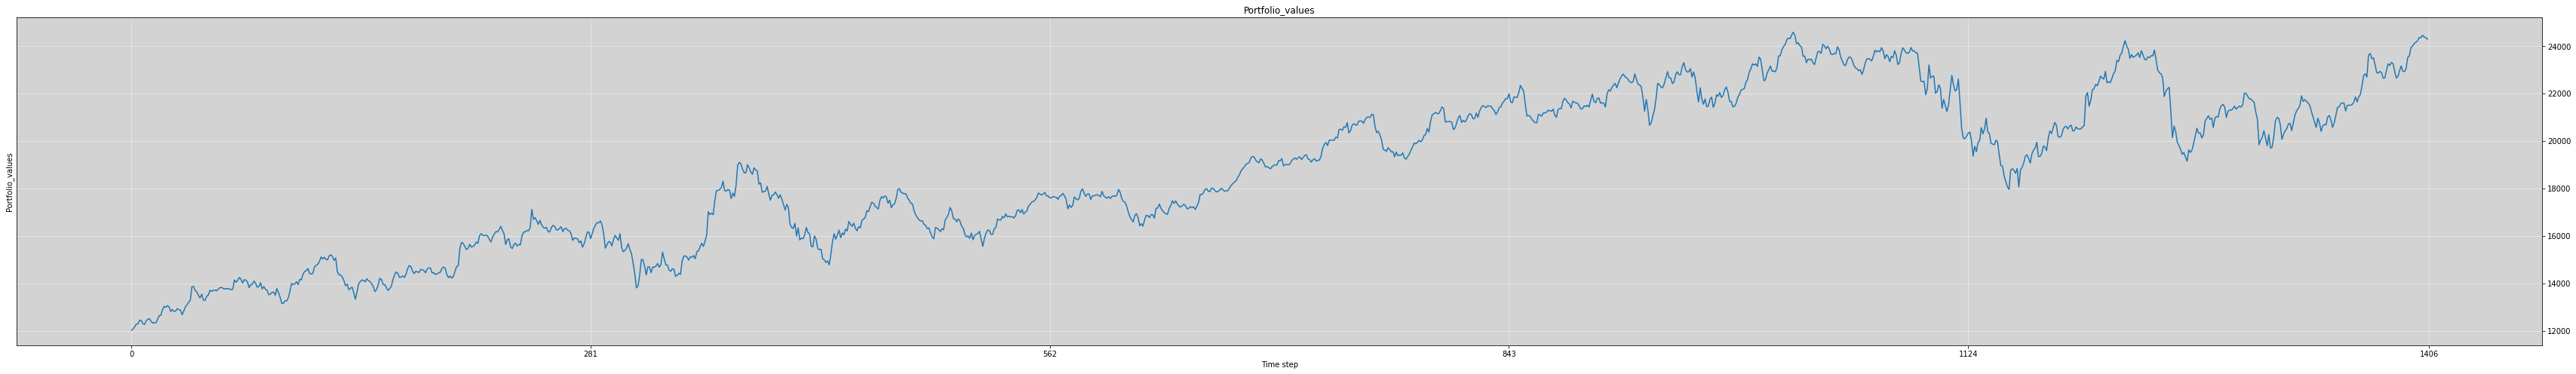

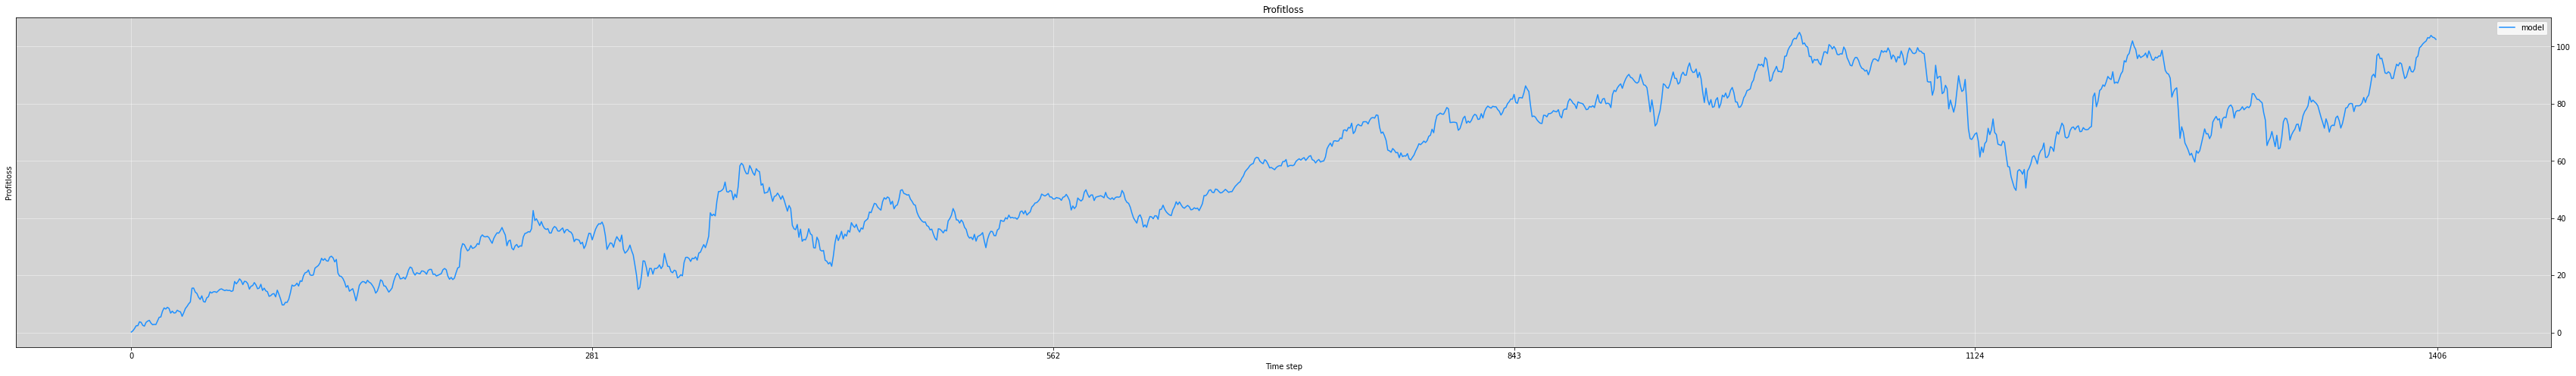

In [11]:
# 학습 수행
learner = PPOLearner(**parameters1)
learner.run(num_episode=num_episode, balance=balance)
learner.save_model(critic_path=utils.SAVE_DIR + "/Models" + "/PPOPortfolio_critic.pth",
                   actor_path=utils.SAVE_DIR + "/Models" + "/PPOPortfolio_actor.pth",
                   score_net_path=utils.SAVE_DIR + "/Models" + "/PPOPortfolio_score.pth")

balance:962.1786522293121
stocks:[25 69 33  8]
actions:[-0.0102 -0.0121  0.0215 -0.0006]
portfolio:[0.107  0.2477 0.1728 0.2213 0.2511]
cum_fee:325.914926915169
balance:1146.9535249710127
stocks:[26 82 26  7]
actions:[ 0.0334  0.0002 -0.0318 -0.0318]
portfolio:[0.1111 0.2716 0.2063 0.2024 0.2086]
cum_fee:572.5603266239166
balance:1117.568828887945
stocks:[25 90 24  7]
actions:[ 0.0328  0.0004 -0.0556  0.0036]
portfolio:[0.0936 0.2613 0.211  0.232  0.2021]
cum_fee:810.6202764606484
balance:1245.8559523964007
stocks:[28 91 22  6]
actions:[-0.1298  0.0347  0.029   0.0342]
portfolio:[0.0987 0.287  0.2166 0.2124 0.1853]
cum_fee:1087.8973261070257
balance:1457.9270861482735
stocks:[14 90 23 11]
actions:[-0.0527  0.0473 -0.0345  0.0417]
portfolio:[0.1003 0.1988 0.2013 0.22   0.2796]
cum_fee:1528.7813024282466
balance:1630.5922892379901
stocks:[12 84 28 11]
actions:[ 0.0159 -0.0341  0.0059 -0.0067]
portfolio:[0.1024 0.2165 0.2365 0.2169 0.2277]
cum_fee:1916.3687782430666
balance:1332.597864933

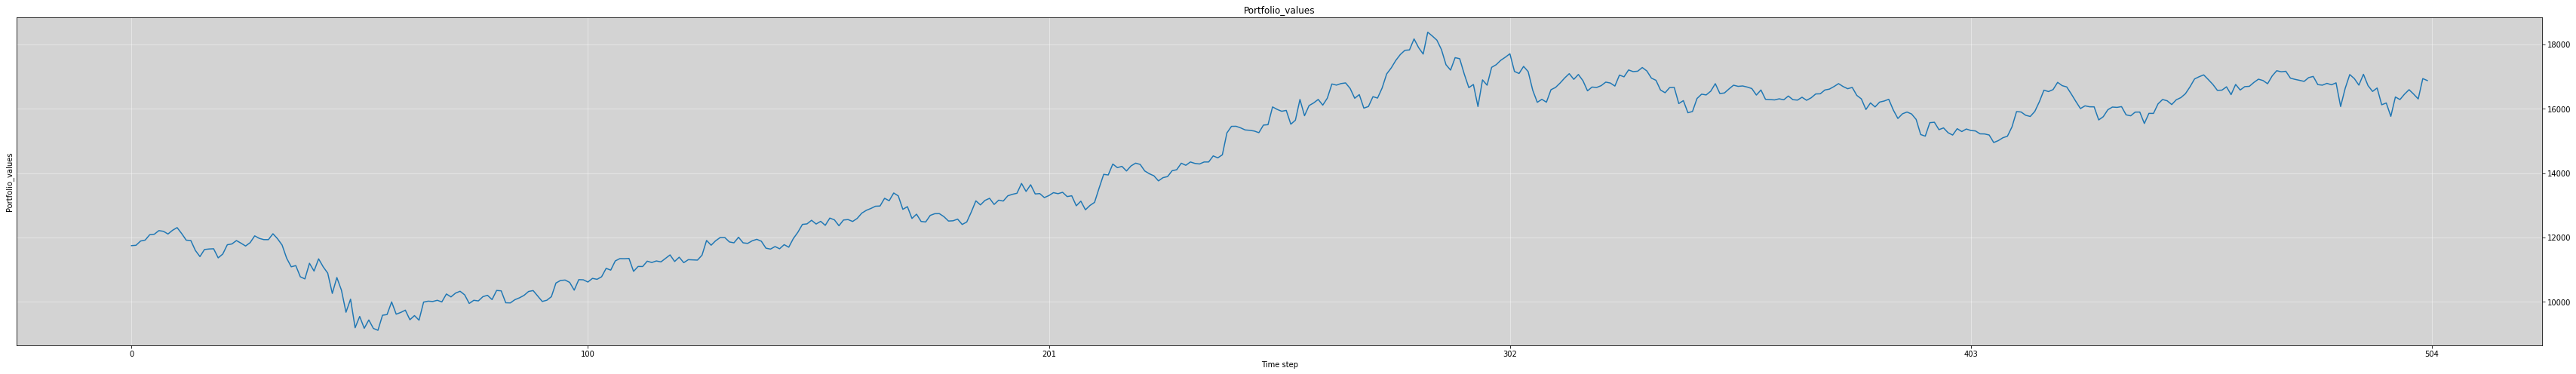

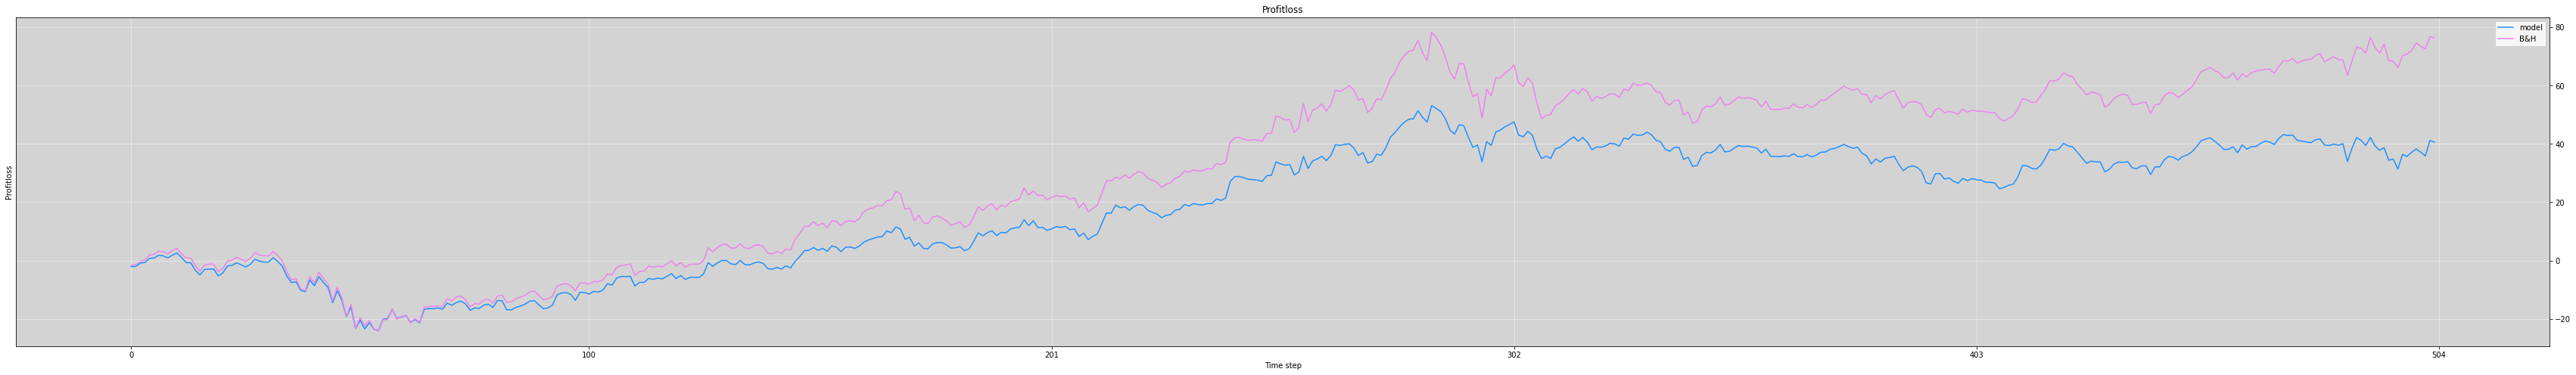

In [12]:
# 테스트 수행
tester = PPOTester(**parameters2)
tester.run()

In [ ]:
! zip -r /content/Metrics.zip /content/Metrics

In [ ]:
! zip -r /content/Models.zip /content/Models

In [ ]:
from google.colab import files
files.download("/content/Metrics.zip")
files.download("/content/Models.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>